# What does data from MCS look like

In [1]:
import pandas as pd
## imiport original csv
ori_df = pd.read_csv('unknown_new.csv',header=None)
## get labels without index and header
label = ori_df.iloc[[2]].to_string(index=False,header=None).split(';')
print('------------------------------------------------------------------')
print(label)
print(f'label type: {type(label)}, size: {len(label)}')
csv_data = pd.DataFrame([],columns=label)
## get coordinates without index and header
coord = ori_df.iloc[[3]].to_string(index=False,header=None).split(';')
print('------------------------------------------------------------------')
print(coord)
print(f'coord type: {type(coord)}, size: {len(coord)}')
## get units without index and header
unit = ori_df.iloc[[4]].to_string(index=False,header=None).split(';')
print('------------------------------------------------------------------')
print(unit)
print(f'unit type: {type(unit)}, size: {len(unit)}')
## drop headers and camera information
clean_csv = ori_df.drop(ori_df.index[:5])
clean_csv = clean_csv.drop(clean_csv.index[-10:])
print('clean_csv',clean_csv)
## concatenate clean_csv with labels
for i in range(5,clean_csv.index[-10]):
    row = ori_df.iloc[[i]].to_string(index=False,header=None).split(';')
    print(row)
    print(f'row type: {type(row)}, size: {len(row)}')
#     print(f'row type: {type(row)}')
#     print(f'row[0]: {row[0]} type: {type(row[0])}')
#     print(f'row[1]: {row[1]} type: {type(row[1])}')
    new_row = pd.DataFrame([row],columns=label)
    csv_data = pd.concat([csv_data,new_row])

------------------------------------------------------------------
['', '', '', 'CenterOfGravity', '', '', 'LWristPositions', '', '', 'LWristAngles', '', '', 'LElbowPositions', '', '', 'LElbowAngles', '', '', 'LShoulderPositions', '', '', 'LShoulderAngles', '', '', 'RWristPositions', '', '', 'RWristAngles', '', '', 'RElbowPositions', '', '', 'RElbowAngles', '', '', 'RShoulderPositions', '', '', 'RShoulderAngles', '', '', 'LToePositions', '', '', 'LToeAngles', '', '', 'LAnklePositions', '', '', 'LAnkleAngles', '', '', 'LKneePositions', '', '', 'LKneeAngles', '', '', 'LHipPositions', '', '', 'LHipAngles', '', '', 'RToePositions', '', '', 'RToeAngles', '', '', 'RAnklePositions', '', '', 'RAnkleAngles', '', '', 'RKneePositions', '', '', 'RKneeAngles', '', '', 'RHipPositions', '', '', 'RHipAngles', '', '', 'LClaviclePositions', '', '', 'LClavicleAngles', '', '', 'LHandEndPositions', '', '', 'LToesEndPositions', '', '', 'RClaviclePositions', '', '', 'RClavicleAngles', '', '', 'RHandEndPositi

ValueError: 173 columns passed, passed data had 194 columns

<IPython.core.display.Javascript object>


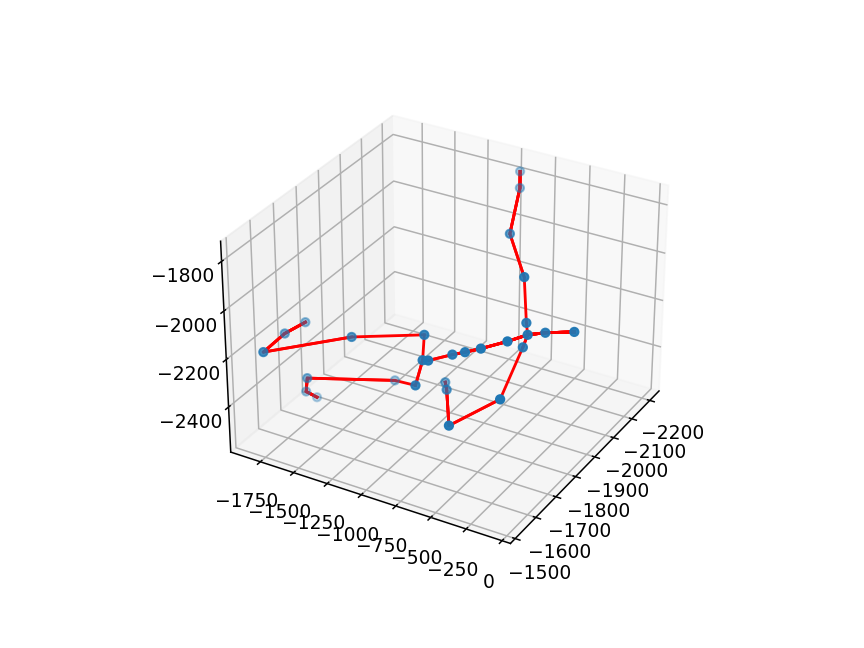

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
%matplotlib inline
# to rotate 3D plot interactively
%matplotlib notebook

# plt.interactive(True)
frames = count()

def connect(points,frame,ax):
    idx_lst = [[],[],[]]
    for i in points:
        idx_lst[0].append(frame[0][i])
        idx_lst[1].append(frame[1][i])
        idx_lst[2].append(frame[2][i])
        ax.plot(idx_lst[0], idx_lst[1], idx_lst[2], color='red')

def connect_with_lines(frame,ax):
    connect([0,1,2,3,4],frame,ax) # right leg
    connect([5,6,7,8,9],frame,ax) # left leg
    connect([10,11,12,13,14],frame,ax) # right arm
    connect([15,16,17,18,19],frame,ax) # left arm
    connect([20,21,22,23,24,25,26,27,28],frame,ax) # spine and head
    connect([14,22,19],frame,ax) # shoulders and neck
    connect([4,28,9],frame,ax) # legs and hip

def get_coordinates(path):
    csv_df = pd.read_csv(path,header=None)
    csv_np = csv_df.to_numpy()
    labels = csv_np[0,:-1]
    # labels:
    #     ['RightFootEE' 'RightToeBase' 'RightFoot' 'RightLeg' 'RightUpLeg'
    #      'LeftFootEE' 'LeftToeBase' 'LeftFoot' 'LeftLeg' 'LeftUpLeg' 'RightHandEE'
    #      'RightHand' 'RightForeArm' 'RightArm' 'RightShoulder' 'LeftHandEE'
    #      'LeftHand' 'LeftForeArm' 'LeftArm' 'LeftShoulder' 'HeadEE' 'Head' 'Neck'
    #      'Spine4' 'Spine3' 'Spine2' 'Spine1' 'Spine' 'Hips']
    coords = csv_np[1:,:-1]
    coords = coords.astype(np.float32) # default in mm?
    # x,y,z
    x_coord = coords[:,1::3]
    y_coord = coords[:,2::3]
    z_coord = coords[:,3::3]
    return x_coord,y_coord,z_coord

def plot_func(frame_id):
    path = 'unknown.3Dprojected06.csv'
    x_coord,y_coord,z_coord = get_coordinates(path)
    plt.cla()
#     frame_id = next(frames)
    ax.scatter3D(x_coord[frame_id], y_coord[frame_id], z_coord[frame_id], cmap='Greens')
    connect_with_lines([x_coord[frame_id], y_coord[frame_id], z_coord[frame_id]],ax)
#     plt.cla()

# plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30, 30)

ani = FuncAnimation(fig,plot_func,frames=500,interval=17)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title(f'frame')
plt.show()

### Reference

##### matplotlib.animation.FuncAnimation:

https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation

##### Example of FuncAnimation:

https://matplotlib.org/stable/gallery/animation/random_walk.html